# O(DACS) Hackathon Day 1

Image Classification: classify images of insects into 3 different groups

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import glob

ImportError: DLL load failed while importing _imaging: Das angegebene Modul wurde nicht gefunden.

In [3]:
print(tf.__version__)

2.10.0


## Import and explore data

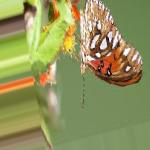

In [9]:
import pathlib
data_dir = "data"
data_dir = pathlib.Path(data_dir)

butter = list(data_dir.glob('Butterfly/*'))
dragon = list(data_dir.glob('Dragonfly/*'))
grass = list(data_dir.glob('Grasshopper/*'))
lady = list(data_dir.glob('Ladybird/*'))
mosq = list(data_dir.glob('Mosquito/*'))

PIL.Image.open(str(butter[0]))


In [10]:
# check number of images per class
for i in [butter, dragon, grass, lady, mosq]:
    print(len(i))

3111
3250
3285
3258
2933


The number of images per class seems quite balanced, but it might be beneficial to balance it. 

### Define parameters and train/test split

In [11]:
# define params
batch_size = 32 # how many images per batch
img_height = 150 # pixel hight of image
img_width = 150 # pixel width of image

# define training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15837 files belonging to 5 classes.
Using 12670 files for training.


In [12]:
# define validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15837 files belonging to 5 classes.
Using 3167 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['Butterfly', 'Dragonfly', 'Grasshopper', 'Ladybird', 'Mosquito']


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

: 

: 

In [48]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 150, 150, 3)
(32,)


We see that we have 32 images per batch, with a dimension of 150x150 pixels, and 3 arrays (R,G,B)

## Define model

In [50]:
# get number of classes
num_classes = len(class_names)

# define model itself
model = Sequential([

# rescale the images (normalize RGB values)
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

# 3 convolution and Maxpooling layers
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


AttributeError: module 'tensorflow.keras.layers' has no attribute 'Rescaling'

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# see model summary
model.summary()

## Run model

In [ ]:
# run the model
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Evaluate the model

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()